# IMDB Linear Regression Total Score
![ImdbIcon](../images/imdbheader.jpg)

Notebook Overview

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Importing so that I can use LinearRegression and OLS Models.
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [2]:
totalscore_df = pd.read_csv('../data/totalscore_df.csv')

In [3]:
totalscore_df.columns

Index(['movie_title', 'year', 'actors', 'plot', 'duration', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'votes',
       'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote',
       'votes_1', 'votes_2', 'votes_3', 'votes_4', 'votes_5', 'votes_6',
       'votes_7', 'votes_8', 'votes_9', 'votes_10', 'us_voters_rating',
       'us_voters_votes', 'plot_sentiment', 'director_score', 'actor_score',
       'actress_score', 'imdb_score'],
      dtype='object')

## Linear Regression

In [4]:
features = ['year', 'duration', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'votes',
       'votes_1', 'votes_2', 'votes_3', 'votes_4', 'votes_5', 'votes_6',
       'votes_7', 'votes_8', 'votes_9', 'votes_10',
       'us_voters_votes', 'plot_sentiment', 'director_score', 'actor_score',
       'actress_score']

In [5]:
X = totalscore_df[features]
y = totalscore_df['imdb_score']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [7]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [8]:
predictions = lr.predict(X_train)

residuals = y_train - predictions

rss = (residuals ** 2).sum()

mse = metrics.mean_squared_error(y_train, predictions)

rmse = np.sqrt(metrics.mean_squared_error(y_train, predictions)).astype(float)

In [9]:
print("RMSE:", rmse)
print("Training Score:", lr.score(X_train, y_train))
print("Testing Score:", lr.score(X_test, y_test))

RMSE: 0.4907370373300642
Training Score: 0.7609165410344939
Testing Score: 0.7679667619602628


In [10]:
null_predictions = np.zeros_like(y_test)

null_pred = null_predictions + y_test.mean()

baseline = metrics.mean_squared_error(y_test, null_pred, squared = False)

In [11]:
print("Baseline RMSE:", baseline)
print("RMSE:", rmse)

Baseline RMSE: 0.9867557370455319
RMSE: 0.4907370373300642


In [26]:
model_params = {}
count = 0

In [34]:
lr_params = {
    'fit_intercept': [False],
    'copy_X': [False],
    'normalize': [True],
}

gs = GridSearchCV(lr, param_grid=lr_params, cv = 5, n_jobs = 12)

gs.fit(X_train, y_train)

count += 1

gs.best_params_['best_score'] = gs.best_score_

gs.best_params_['training_score'] = gs.score(X_train, y_train)

gs.best_params_['testing_score'] = gs.score(X_test, y_test)

model_params[f'model_{count}'] = gs.best_params_

model_df = pd.DataFrame.from_dict(model_params, orient='index')

model_df

,copy_X,fit_intercept,normalize,best_score,training_score,testing_score
model_1,True,True,True,0.744606,0.760878,0.767755
model_2,True,False,True,0.737738,0.756241,0.763733
model_3,False,False,True,0.737738,0.756241,0.763733
model_4,False,False,False,0.737738,0.756241,0.763733
model_5,False,True,False,0.744590,0.760917,0.767967
model_6,True,False,False,0.737738,0.756241,0.763733
model_7,False,False,False,0.737738,0.756241,0.763733
model_8,False,False,True,0.737738,0.756241,0.763733


## Visualizations

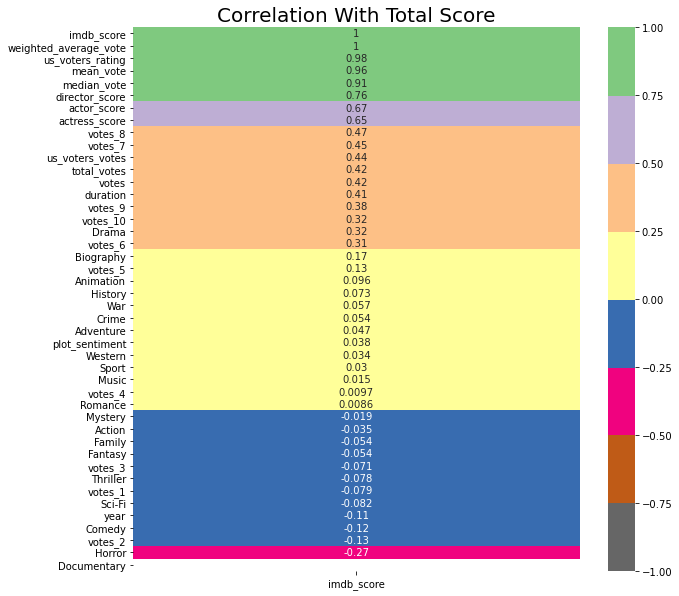

In [12]:
plt.figure(figsize = (10, 10))

movie_feature_corr = totalscore_df.corr()[['imdb_score']]

sns.heatmap(movie_feature_corr.sort_values(by = 'imdb_score', ascending = False),
           vmin = -1, vmax = 1,
           cmap = 'Accent_r',
           annot = True);

plt.title("Correlation With Total Score", size = 20);